<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.4
# *PCA Lab*

**In this lab, we will:**
- Explore how PCA is related to correlation.
- Use PCA to perform dimensionality reduction.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [6]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [7]:
breast_cancer = pd.read_csv('breast-cancer-wisconsin-data.csv')

### 2. EDA

Explore dataset. Clean data. Find correlation.

### 3. Subset & Normalise

Subset the data to only include all columns except diagnosis, then apply StandardScaler.

In [10]:
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,8510426,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,8510653,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,8510824,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,854941,0,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,85713702,0,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [12]:
breast_cancer.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926125,1,20.92,25.09,143.0,1347.0,0.10990,0.2236,0.31740,0.14740,...,24.29,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
565,926424,1,21.56,22.39,142.0,1479.0,0.11100,0.1159,0.24390,0.13890,...,25.45,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
566,926682,1,20.13,28.25,131.2,1261.0,0.09780,0.1034,0.14400,0.09791,...,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
567,926954,1,16.60,28.08,108.3,858.1,0.08455,0.1023,0.09251,0.05302,...,18.98,34.12,126.7,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820
568,927241,1,20.60,29.33,140.1,1265.0,0.11780,0.2770,0.35140,0.15200,...,25.74,39.42,184.6,1821.0,0.1650,0.8681,0.9387,0.2650,0.4087,0.12400


In [14]:
breast_cancer.shape

(569, 32)

In [16]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [18]:
breast_cancer.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

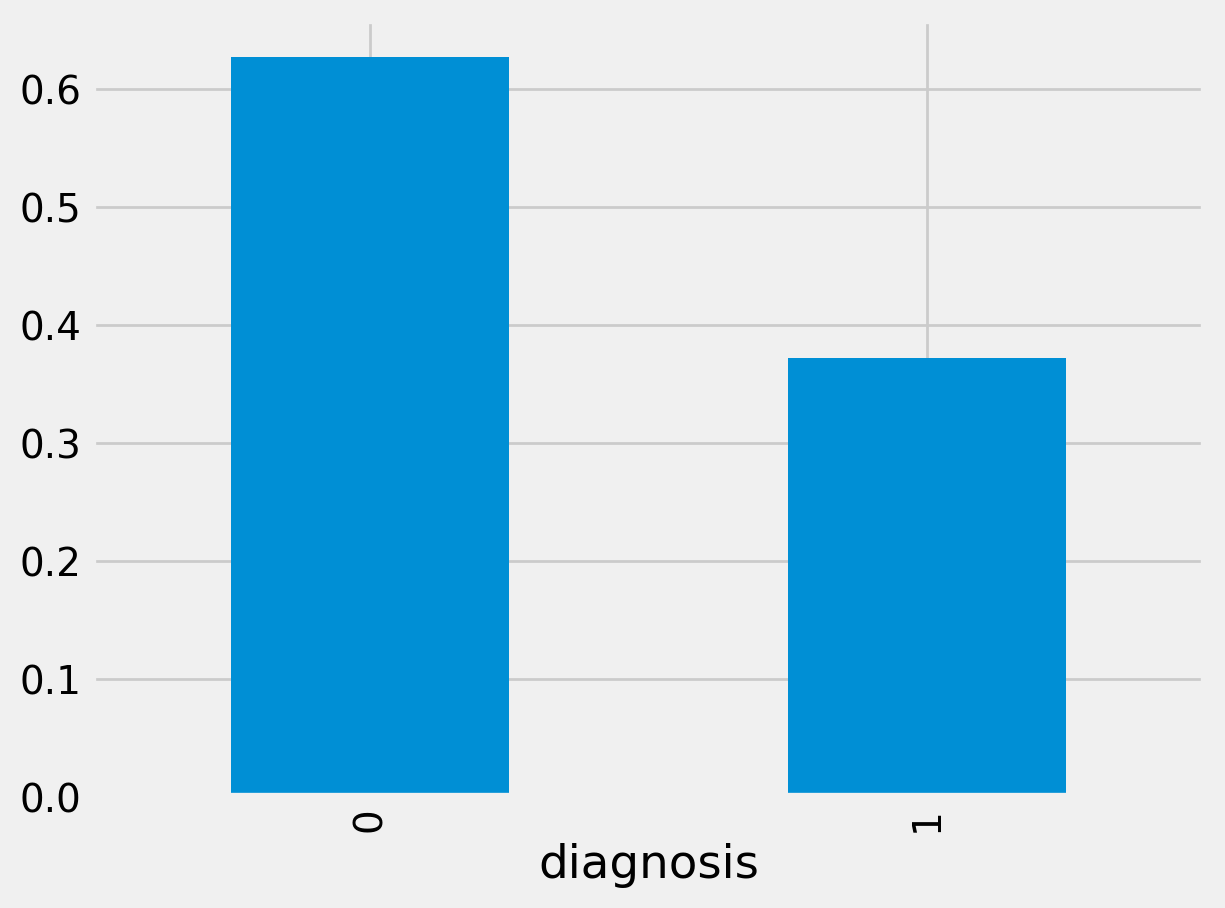

In [26]:
breast_cancer['diagnosis'].value_counts(normalize=True).plot(kind='bar');
plt.show()

In [ ]:
# ANSWER

### Calculate correlation matrix

We will be using the correlation matrix to calculate the eigenvectors and eigenvalues.

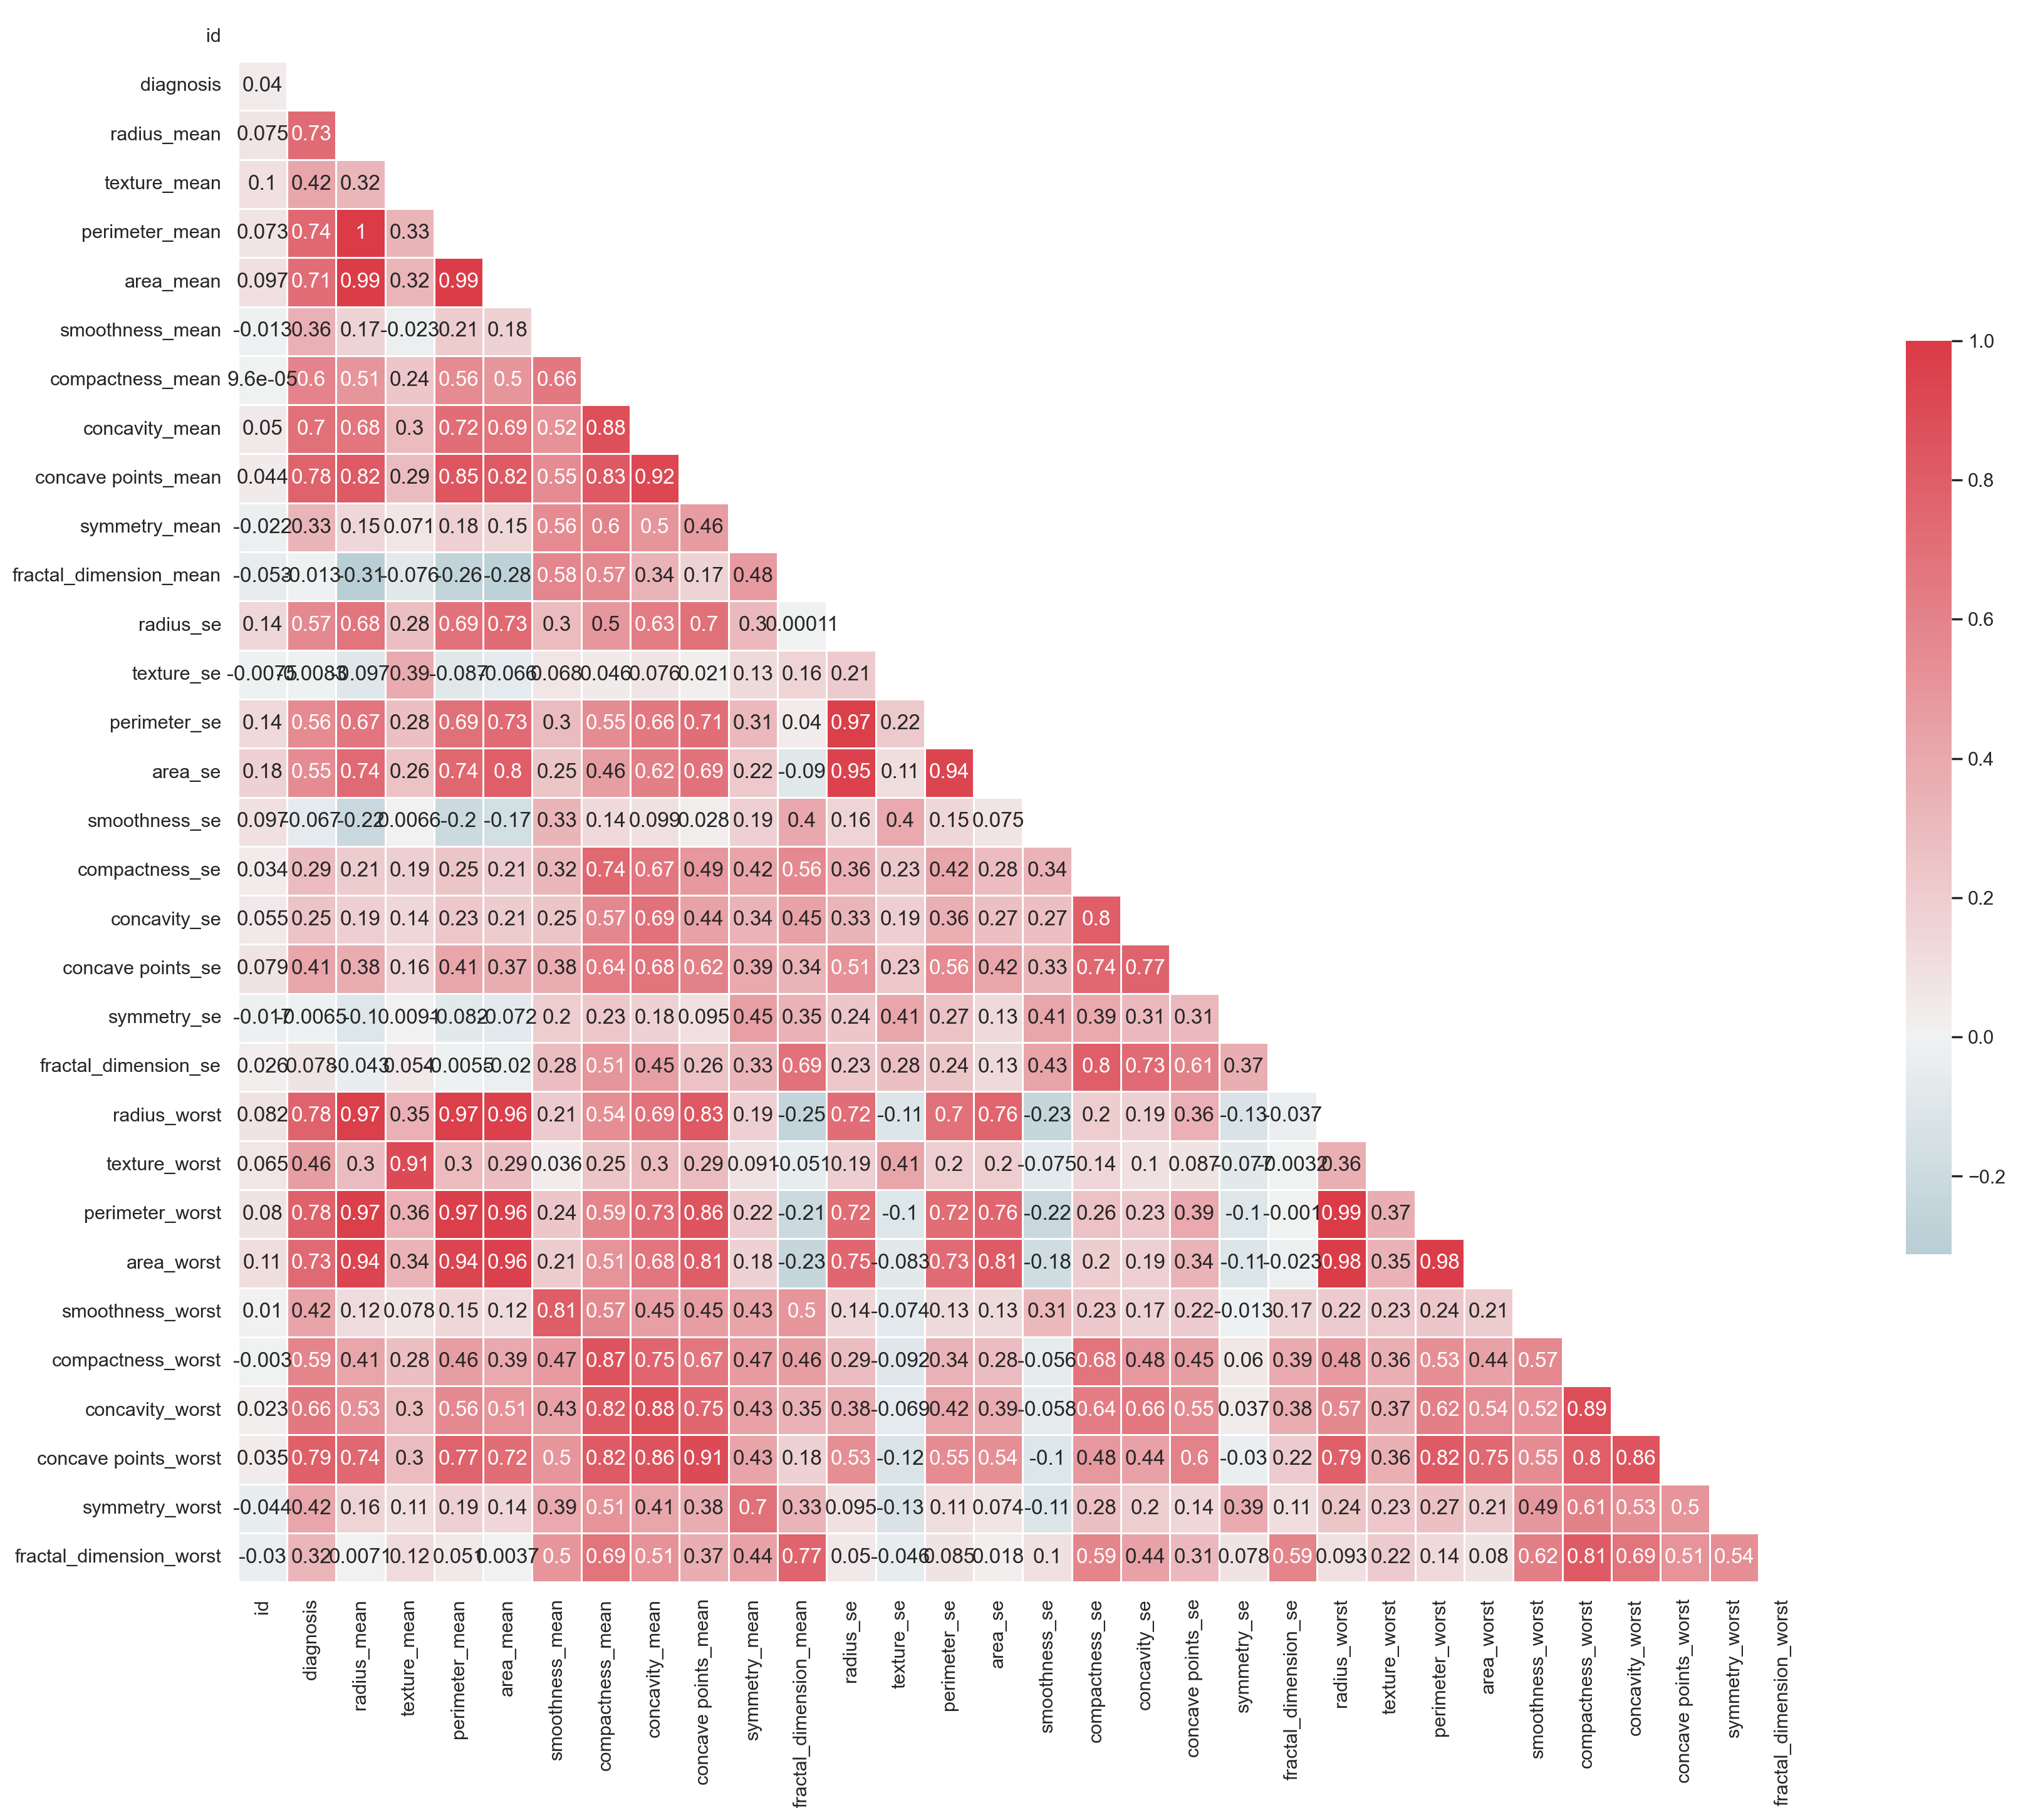

In [31]:
# ANSWER# Copied code from seaborn examples
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(breast_cancer.corr(numeric_only=True), dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(breast_cancer.corr(numeric_only=True), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

In [33]:
from sklearn.preprocessing import StandardScaler

In [35]:
breast_cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [37]:
# Select target column name
target_column = 'diagnosis'

# Save feature column names as a list
feature_columns = breast_cancer.columns.drop('diagnosis')
#feature_columns = [c for c in breast_cancer.columns if c != 'diagnosis']
feature_columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [39]:
# Use feature_columns and target_column to subset data
X = breast_cancer[feature_columns]
y = breast_cancer['diagnosis']

In [41]:
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,8510426,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,8510653,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,8510824,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,854941,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,85713702,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [45]:
X.tail()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926125,20.92,25.09,143.0,1347.0,0.10990,0.2236,0.31740,0.14740,0.2149,...,24.29,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
565,926424,21.56,22.39,142.0,1479.0,0.11100,0.1159,0.24390,0.13890,0.1726,...,25.45,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
566,926682,20.13,28.25,131.2,1261.0,0.09780,0.1034,0.14400,0.09791,0.1752,...,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
567,926954,16.60,28.08,108.3,858.1,0.08455,0.1023,0.09251,0.05302,0.1590,...,18.98,34.12,126.7,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820
568,927241,20.60,29.33,140.1,1265.0,0.11780,0.2770,0.35140,0.15200,0.2397,...,25.74,39.42,184.6,1821.0,0.1650,0.8681,0.9387,0.2650,0.4087,0.12400


In [47]:
# Use StandardScaler to fit and transform X to be standardised
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

In [49]:
Xs

array([[-0.17501631, -0.16679919, -1.1471623 , ...,  0.21612292,
         0.12334653, -0.62929189],
       [-0.17501449, -0.29744572, -0.83300824, ..., -0.63610973,
         0.45822712, -0.11724974],
       [-0.17501312, -1.31308049, -1.59395919, ..., -0.7969026 ,
        -0.72922385, -0.34445459],
       ...,
       [-0.23572964,  1.70485436,  2.08513394, ...,  0.73382724,
        -0.53185462, -0.97397828],
       [-0.23572747,  0.70228425,  2.0455738 , ...,  0.41406869,
        -1.10454895, -0.31840916],
       [-0.23572517,  1.83834103,  2.33645719, ...,  2.28998549,
         1.91908301,  2.21963528]])

### 4. Calculate the eigenvalues and eigenvectors from the correlation matrix

numpy has a convenient function to calculate this:

    eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

In [51]:
# ANSWER
pd.DataFrame(Xs, columns=feature_columns)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.175016,-0.166799,-1.147162,-0.185728,-0.251957,0.101747,-0.436850,-0.278210,-0.028609,0.267911,...,-0.240048,-1.045005,-0.225217,-0.297761,0.509873,-0.489605,-0.159223,0.216123,0.123347,-0.629292
1,-0.175014,-0.297446,-0.833008,-0.261106,-0.383638,0.792763,0.429422,-0.541362,-0.459627,0.567289,...,-0.366368,-0.844707,-0.332744,-0.439624,-0.051226,0.148443,-0.399099,-0.636110,0.458227,-0.117250
2,-0.175013,-1.313080,-1.593959,-1.302806,-1.083572,0.429819,-0.747086,-0.743748,-0.726337,0.012345,...,-1.250611,-1.631243,-1.254913,-0.994422,0.001377,-0.887193,-0.880434,-0.796903,-0.729224,-0.344455
3,-0.236304,-0.311646,-0.202373,-0.385500,-0.372831,-0.464730,-1.263703,-0.793214,-0.507861,-1.258183,...,-0.614867,-0.466909,-0.679153,-0.588344,-1.549975,-1.323648,-1.073966,-0.981753,-1.478256,-1.233324
4,0.443052,-1.684571,-0.570050,-1.658278,-1.288347,-0.737294,-0.851130,-0.915500,-1.109197,-0.155598,...,-1.512777,-0.605327,-1.489328,-1.122222,-0.116980,-0.754239,-0.975761,-1.354653,0.330422,-0.546168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.235734,1.929226,1.349781,2.101976,1.968434,0.963560,2.260135,2.870075,2.540213,1.231760,...,1.660970,0.607860,2.139779,1.649655,0.365215,1.045400,1.860055,2.125538,0.045693,0.819278
565,-0.235732,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
566,-0.235730,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
567,-0.235727,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409


In [53]:
# Creating a dataframe from Xs and calculate correlation matrix with .corr() method

Xcorr = pd.DataFrame(Xs, columns=feature_columns).corr()
Xcorr

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [55]:
type(Xcorr)

pandas.core.frame.DataFrame

In [69]:
# Calculate eigenvalues and eigenvectors of correlation matrix
eig_vals, eig_vecs = np.linalg.eig(Xcorr)

In [71]:
# How many eigenvalues are there?
len(eig_vals)

31

In [73]:
eig_vals

array([1.32880574e+01, 5.69680537e+00, 2.83539505e+00, 1.98135718e+00,
       1.64881531e+00, 1.23467271e+00, 9.78273239e-01, 6.71752969e-01,
       4.60792428e-01, 4.03133096e-01, 3.49154976e-01, 2.93890434e-01,
       2.61146925e-01, 2.41330214e-01, 1.56973649e-01, 9.41285258e-02,
       7.98099486e-02, 5.90462723e-02, 5.25911946e-02, 4.91219277e-02,
       3.10707842e-02, 2.99412056e-02, 2.74305238e-02, 2.42490222e-02,
       1.80393609e-02, 1.54797297e-02, 8.17169884e-03, 6.89810286e-03,
       1.33040206e-04, 7.48376054e-04, 1.58933755e-03])

In [ ]:
# Print the corresponding eigenvector
eig_vecs[0]

In [77]:
# How many eigenvectors are there?
len(eig_vecs)

31

### 5. Calculate and plot the explained variance

A useful measure is the **explained variance**, which is calculated from the eigenvalues.

The explained variance tells us how much information (variance) is captured by each principal component.

### $$ ExpVar_i = \bigg(\frac{eigenvalue_i}{\sum_j^n{eigenvalue_j}}\bigg) * 100$$

In [59]:
def calculate_cum_var_exp(eig_vals):
    tot = sum(eig_vals)
    #var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
    #var_exp = [(i / tot)*100 for i in eig_vals]
    var_exp = []
    for i in eig_vals:
        var_i = (i / tot)*100
        var_exp.append(var_i)
    cum_var_exp = np.cumsum(var_exp)
    return cum_var_exp

In [79]:
def plot_var_exp(eig_vals):

    cum_var_exp = calculate_cum_var_exp(eig_vals)

    plt.figure(figsize=(9,7))

    component_number = [i+1 for i in range(len(cum_var_exp))]

    plt.plot(component_number, cum_var_exp, lw=7)

    plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
    plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')

    ax = plt.gca()
    ax.set_xlim([1,30])
    ax.set_ylim([-5,105])

    ax.set_ylabel('cumulative variance explained', fontsize=16)
    ax.set_xlabel('component', fontsize=16)

    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(12)

    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(12)

    ax.set_title('component vs cumulative variance explained\n', fontsize=20)

    plt.show()

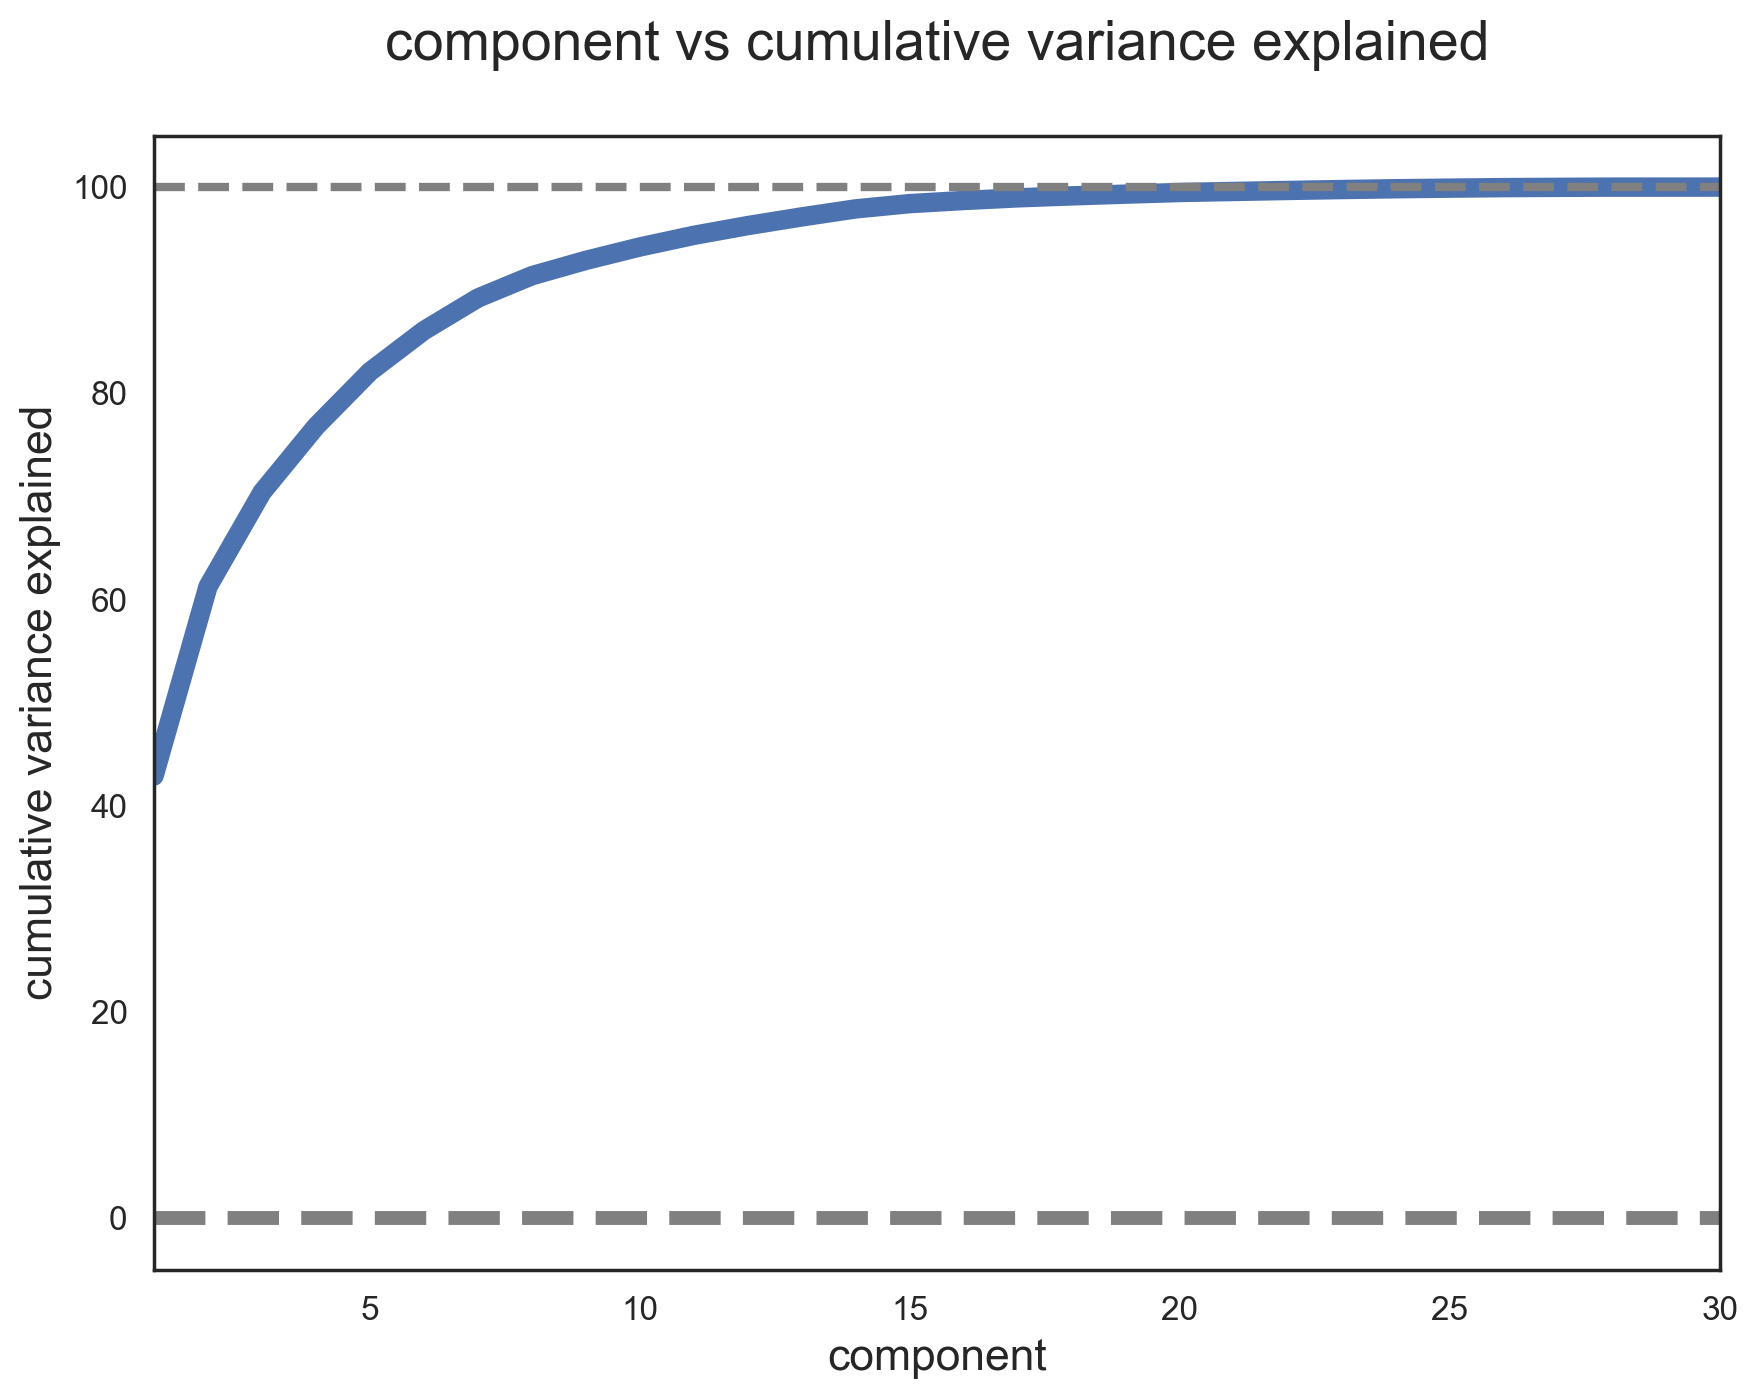

In [81]:
plot_var_exp(eig_vals)

### 6. Using sklearn For PCA

    from sklearn.decomposition import PCA
    
- Create an instance of PCA
    - Fit X
- Plot the cumulative explained variance
- Apply dimensionality reduction to X with n_components=16
    - Fit and transform X
- Create a pairplot of PCA-transformed data

In [83]:
from sklearn.decomposition import PCA


In [85]:
# ANSWER
# Create an instance of PCA (do not set n_components)
# Instantiate the PCA class
breast_pca = PCA()

# Fit Xs (breast cancer dataset having standardised features)
# Fit PCA with standardised features
breast_pca.fit(Xs)




PCA()

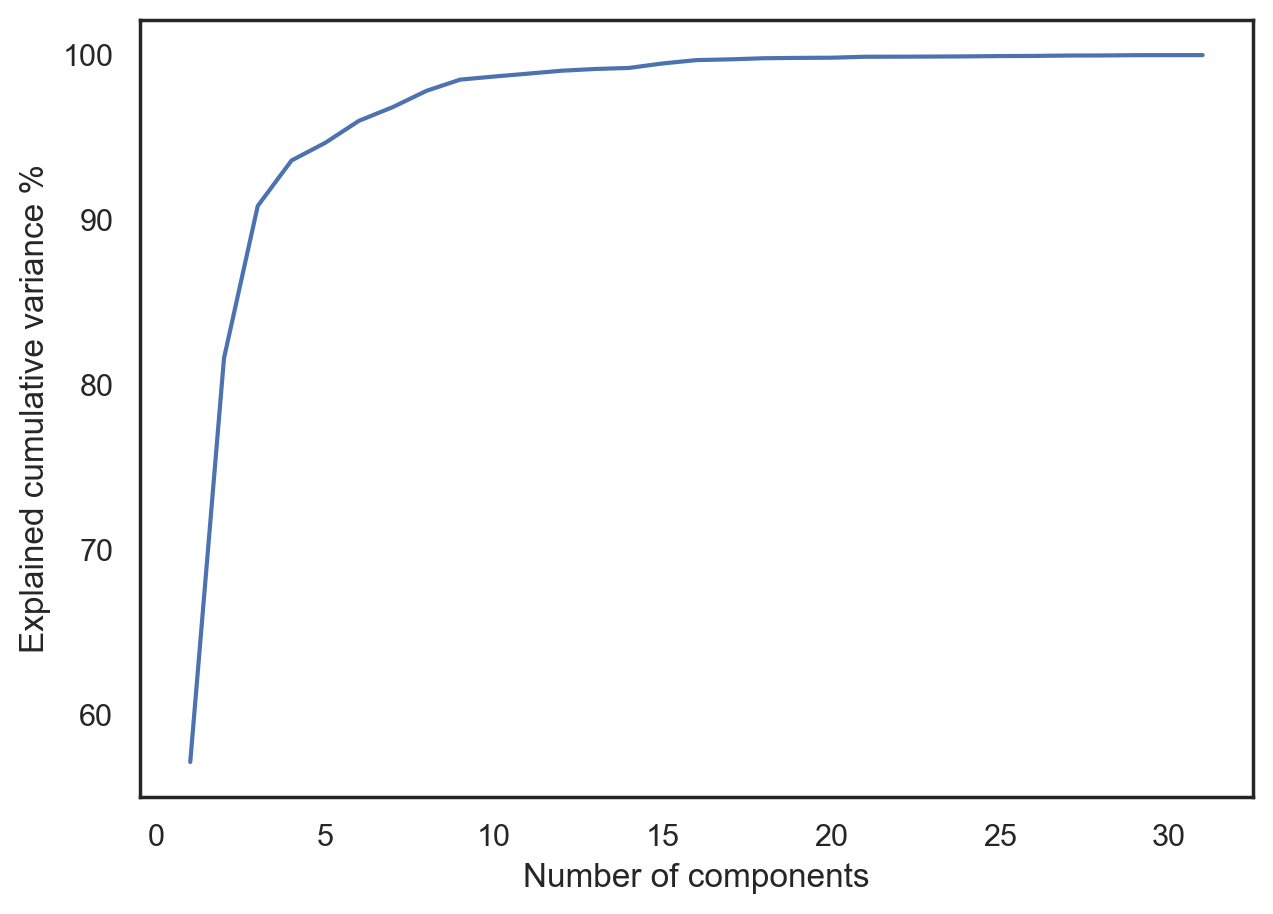

In [91]:
# ANSWER
# Plot cumulative variance explained vs number of components
plt.plot(range(1, 32), 100 - (100*breast_pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained cumulative variance %')
plt.show()


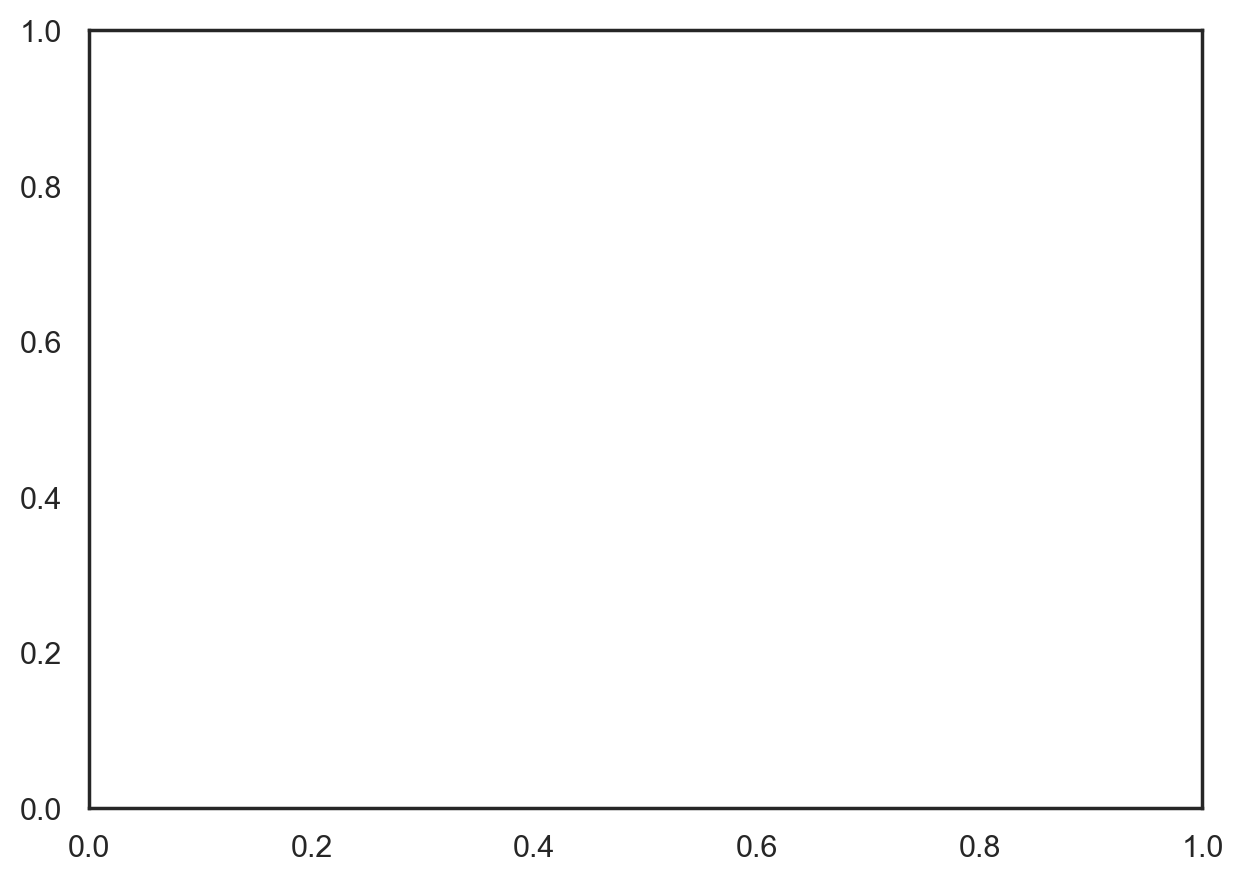

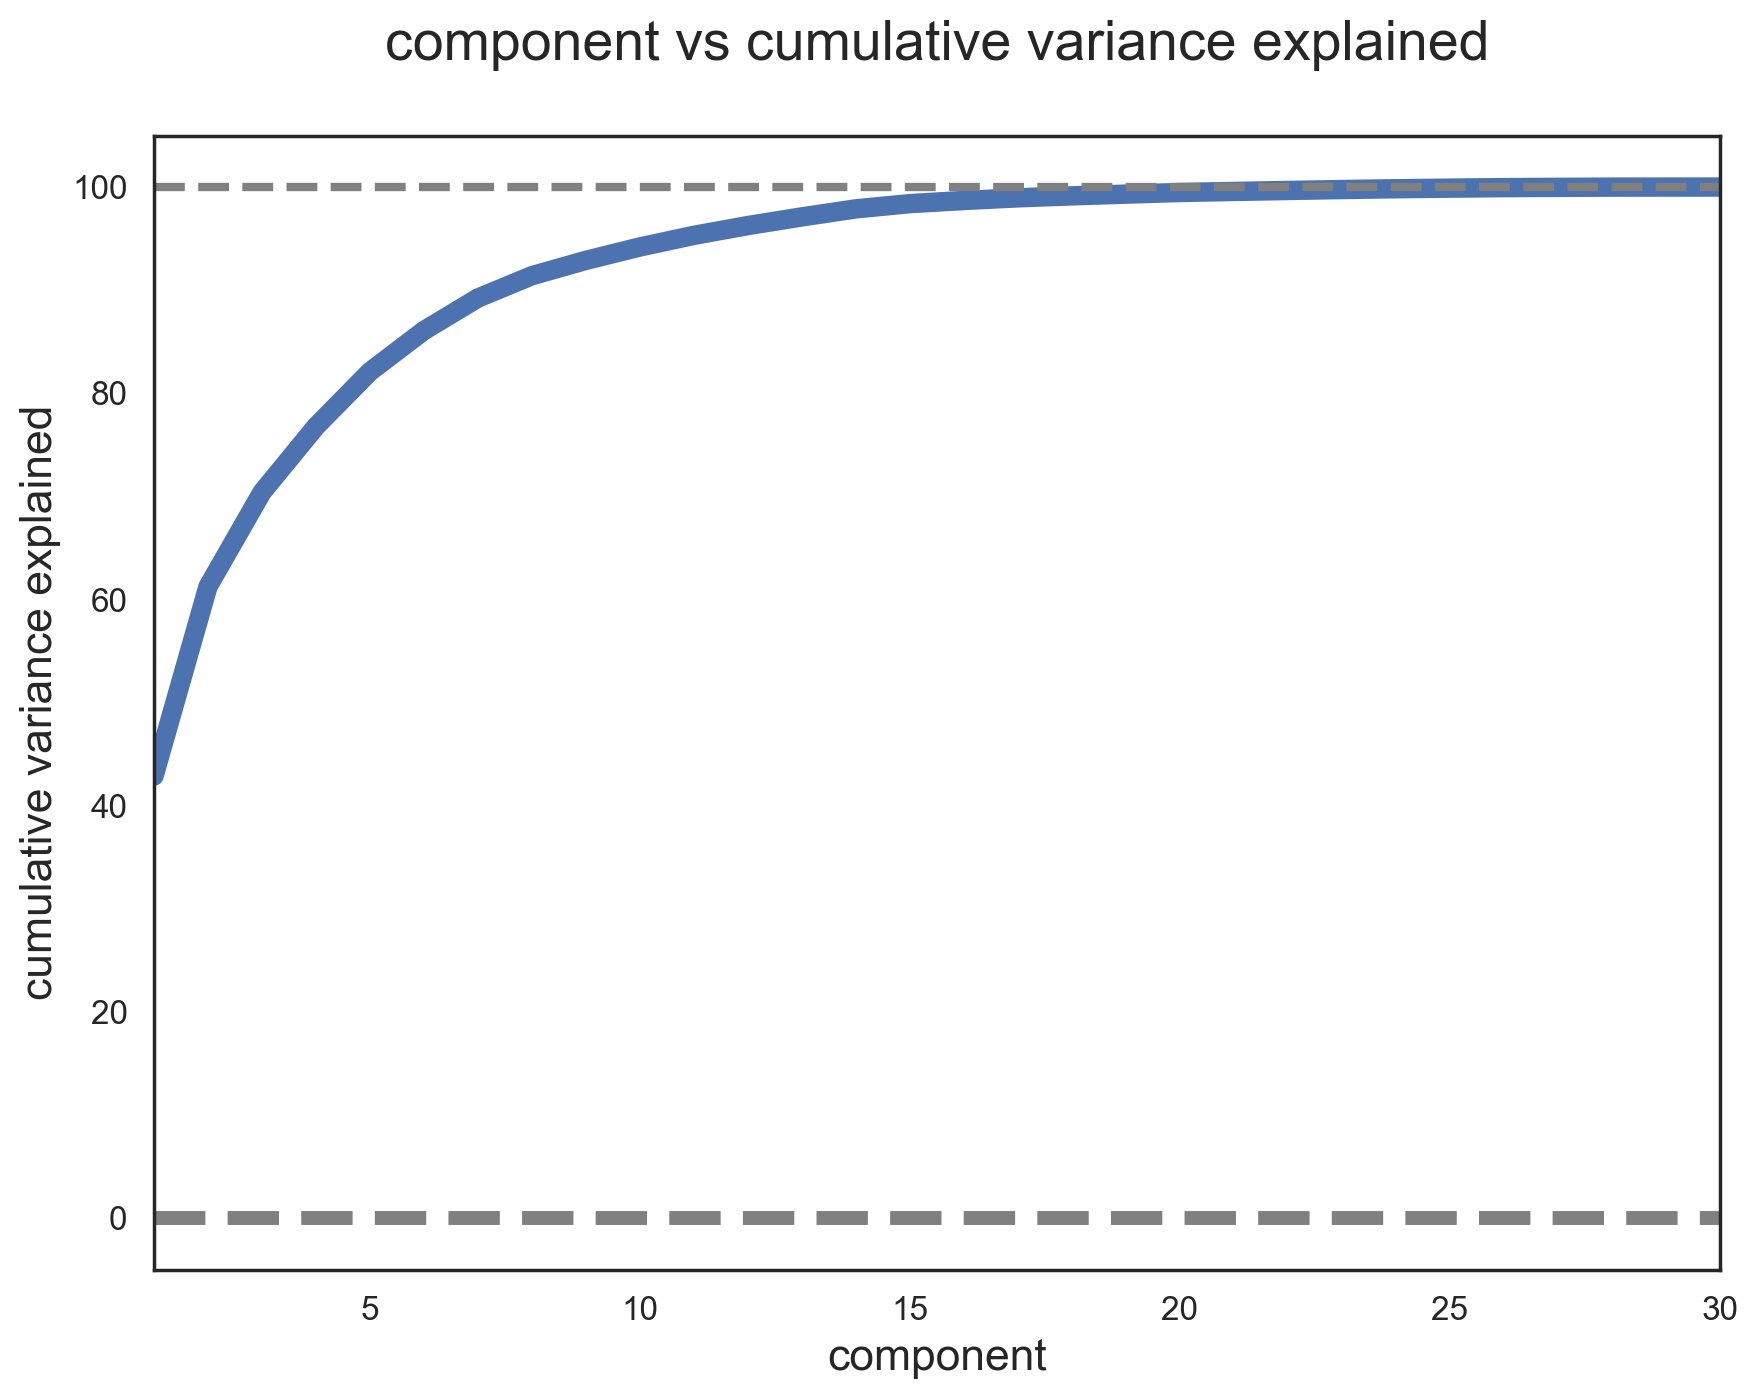

In [89]:
# Plot cumulative variance explained vs number of components with custom plot_var_exp function
plot_var_exp(breast_pca.explained_variance_)

In [93]:
# ANSWER
# Create another instance of PCA (this time with n_components = 16)
breast_pca = PCA(n_components=16)
# Fit and transform Xs (breast cancer dataset having standardised features)
breast_pca.fit(Xs)
std_x_pca = breast_pca.transform(Xs)

In [95]:
# Show principal components as a dataframe

pd.DataFrame(std_x_pca).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.240915,-0.182281,-0.608631,-1.595656,0.443167,-0.039029,-0.073463,-1.217689,0.261512,0.469731,0.049955,0.084793,0.321872,0.242504,-0.147987,-0.278816
1,-1.582995,0.581266,-1.810952,-1.119826,0.396496,0.399906,0.087846,0.369973,-0.789582,-0.417363,0.303684,-0.249856,-0.180727,-0.537765,0.534607,0.631902
2,-3.560995,1.662393,0.448664,-2.073269,0.493297,-0.726681,-0.267922,-0.179232,-0.364318,0.477783,0.036975,-0.298153,0.118183,0.106757,-0.550096,0.209370
3,-3.752910,-1.411090,1.691719,0.543979,-0.089547,0.527772,-0.790737,-0.652115,-1.332283,-1.129304,-1.211889,0.044992,-0.405004,0.238460,-0.368618,-0.148026
4,-4.571165,1.461995,0.106417,-0.278940,0.720877,0.306289,0.942742,0.104788,0.654453,0.424483,-0.118462,-0.090420,0.024892,-0.379819,-0.241607,0.278679


In [97]:
pd.DataFrame(Xs, columns=feature_columns)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.175016,-0.166799,-1.147162,-0.185728,-0.251957,0.101747,-0.436850,-0.278210,-0.028609,0.267911,...,-0.240048,-1.045005,-0.225217,-0.297761,0.509873,-0.489605,-0.159223,0.216123,0.123347,-0.629292
1,-0.175014,-0.297446,-0.833008,-0.261106,-0.383638,0.792763,0.429422,-0.541362,-0.459627,0.567289,...,-0.366368,-0.844707,-0.332744,-0.439624,-0.051226,0.148443,-0.399099,-0.636110,0.458227,-0.117250
2,-0.175013,-1.313080,-1.593959,-1.302806,-1.083572,0.429819,-0.747086,-0.743748,-0.726337,0.012345,...,-1.250611,-1.631243,-1.254913,-0.994422,0.001377,-0.887193,-0.880434,-0.796903,-0.729224,-0.344455
3,-0.236304,-0.311646,-0.202373,-0.385500,-0.372831,-0.464730,-1.263703,-0.793214,-0.507861,-1.258183,...,-0.614867,-0.466909,-0.679153,-0.588344,-1.549975,-1.323648,-1.073966,-0.981753,-1.478256,-1.233324
4,0.443052,-1.684571,-0.570050,-1.658278,-1.288347,-0.737294,-0.851130,-0.915500,-1.109197,-0.155598,...,-1.512777,-0.605327,-1.489328,-1.122222,-0.116980,-0.754239,-0.975761,-1.354653,0.330422,-0.546168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.235734,1.929226,1.349781,2.101976,1.968434,0.963560,2.260135,2.870075,2.540213,1.231760,...,1.660970,0.607860,2.139779,1.649655,0.365215,1.045400,1.860055,2.125538,0.045693,0.819278
565,-0.235732,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
566,-0.235730,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
567,-0.235727,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409


In [105]:
# ANSWER
# Create a pairplot of PCA-transformed data
sns.pairplot(pd.DataFrame(std_x_pca), kind='reg');

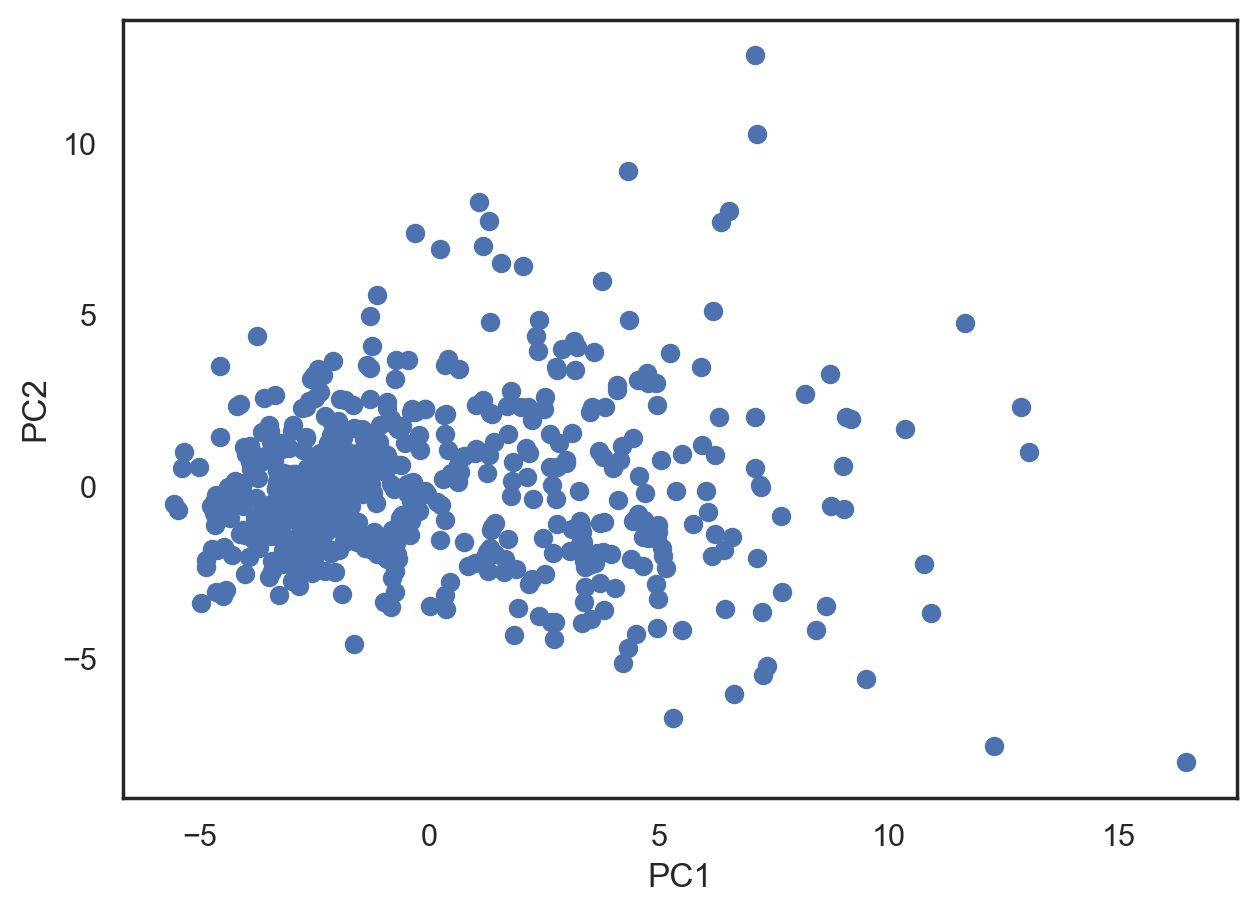

In [103]:
# Plot PC1 vs PC2
plt.scatter(std_x_pca[:, 0], std_x_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

You should notice that the transformed features have been decorrelated (neither increasing nor decreasing trends in pairs of variables).

### 7. Split Data to 80/20 and use PCA prior to a supervised learning task

In this section we use PCA as a preprocessing step to a supervised learning algorithm.

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

Split the original dataset 80/20. Then apply standard scaler followed by PCA.

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply standard scaler to X_train and X_test (fit_transform on X_train, transform on X_test):
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the PCA class and set at 16 components
breast_pca = PCA(n_components=16)

# Apply PCA to the standardised features
X_train_scaled_pca = breast_pca.fit_transform(X_train_scaled)
X_test_scaled_pca = breast_pca.transform(X_test_scaled)

Apply a KNN algorithm on `X_train_scaled` and `X_train_scaled_pca` with 5 neighbours, then evaluate using `X_test_scaled` and `X_test_scaled_pca`. Has performance been impacted as a result of dimension reduction?

In [117]:
# Set KNN classifier to use 5 neighbors and fit to X_train_scaled
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train_scaled, y_train)

# Test accuracy of KNN using standardised data
print("Number of features in standardised data:       ", X_test_scaled.shape[1])
print("Test accuracy using standardised data:    ", knn5.score(X_test_scaled, y_test))

Number of features in standardised data:        31
Test accuracy using standardised data:     0.9298245614035088


In [119]:
# Set KNN classifier to use 5 neighbors and fit to X_train_scaled_pca
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train_scaled_pca, y_train)

# Test accuracy of KNN using standardised PCA-transformed data
print("Number of features in standardised PCA-transformed data:       ", X_test_scaled_pca.shape[1])
print("Test accuracy using standardised PCA-transformed data:    ", knn5.score(X_test_scaled_pca, y_test))

Number of features in standardised PCA-transformed data:        16
Test accuracy using standardised PCA-transformed data:     0.9298245614035088


**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Breast Cancer Machine Learning Prediction](https://gtraskas.github.io/post/breast_cancer/)

[Understanding PCA (Principal Component Analysis) with Python](https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21)



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



